Simple example of using evolution strategies inside `es.py` for toy deterministic fitness function.

In [3]:
# Jupyter magic

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cma
from es import SimpleGA, CMAES, PEPG, OpenES

In [5]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py
def rastrigin(x):
  """Rastrigin test objective function, shifted by 10. units away from origin"""
  x = np.copy(x)
  x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

fit_func = rastrigin

In [6]:
NPARAMS = 10        # make this a 100-dimensinal problem.
NPOPULATION = 101    # use population size of 101.
MAX_ITERATION = 40 # run each solver for 5000 generations.

In [12]:
# defines a function to use solver to solve fit_func
def test_solver(solver, print_mod=10):
  history = []
  for j in range(MAX_ITERATION):
    solutions = solver.ask()
    fitness_list = np.zeros(solver.popsize)
    for i in range(solver.popsize):
      fitness_list[i] = fit_func(solutions[i])
    solver.tell(fitness_list)
    result = solver.result() # first element is the best solution, second element is the best fitness
    history.append(result[1])
    if (j+1) % print_mod == 0:
      print("fitness at iteration", (j+1), result[1])
  print("local optimum discovered by solver:\n", result[0])
  print("fitness score at this local optimum:", result[1])
  return history

In [8]:
x = np.zeros(NPARAMS) # 100-dimensional problem
print("This is F(0):")
print(rastrigin(x))

This is F(0):
-1000.0


In [9]:
x = np.ones(NPARAMS)*10. # 100-dimensional problem
print(rastrigin(x))
print("global optimum point:\n", x)

-0.0
global optimum point:
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [13]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=0.5,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

In [14]:
ga_history = test_solver(ga)

fitness at iteration 10 -466.30872289792586
fitness at iteration 20 -152.05602562039525
fitness at iteration 30 -83.7405033776206
fitness at iteration 40 -56.50545117720871
local optimum discovered by solver:
 [11.11829594  8.69195775 10.98604391  6.99680128  8.98206678  9.10008007
  8.84903352  9.26814461  8.91815263  8.88249912]
fitness score at this local optimum: -56.50545117720871


In [15]:
# defines CMA-ES algorithm solver
cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.5
          )

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 10 (seed=202741, Fri Oct 30 21:26:14 2020)


In [16]:
cma_history = test_solver(cmaes)

fitness at iteration 10 -195.34887099892154
fitness at iteration 20 -55.057159991633135
fitness at iteration 30 -38.0288625428312
fitness at iteration 40 -34.77553961183287
local optimum discovered by solver:
 [ 9.82174954  9.92779386  9.03087145  9.87742764  9.96901976  8.99743577
 10.79147567  8.92138894 10.16384672 10.21137187]
fitness score at this local optimum: -34.77553961183287


In [17]:
# defines PEPG (NES) solver
pepg = PEPG(NPARAMS,                         # number of model parameters
            sigma_init=0.5,                  # initial standard deviation
            learning_rate=0.1,               # learning rate for standard deviation
            learning_rate_decay=1.0,       # don't anneal the learning rate
            popsize=NPOPULATION,             # population size
            average_baseline=False,          # set baseline to average of batch
            weight_decay=0.00,            # weight decay coefficient
            rank_fitness=False,           # use rank rather than fitness numbers
            forget_best=False)            # don't keep the historical best solution)

In [18]:
pepg_history = test_solver(pepg)

fitness at iteration 10 -839.0541215422825
fitness at iteration 20 -704.44352944854
fitness at iteration 30 -567.9593086190479
fitness at iteration 40 -454.86077804408
local optimum discovered by solver:
 [3.07138767 3.31796172 3.17909965 3.21168629 3.97247364 4.05913254
 3.91654056 2.88521011 3.91938348 3.90218502]
fitness score at this local optimum: -454.86077804408


In [19]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=0.5,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

In [20]:
oes_history = test_solver(oes)

fitness at iteration 10 -842.5975683775566
fitness at iteration 20 -686.0041051989017
fitness at iteration 30 -552.6600842921868
fitness at iteration 40 -439.91367445175666
local optimum discovered by solver:
 [3.20300513 4.04874505 3.7628191  3.90790949 3.97652621 4.23652832
 4.00946955 3.37888992 4.0611713  3.17769117]
fitness score at this local optimum: -439.91367445175666


In [21]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
# this version turns on antithetic sampling. It doesn't really help, and sometimes hurts performance.
oes_antithetic = OpenES(NPARAMS,            # number of model parameters
                 sigma_init=0.5,            # initial standard deviation
                 sigma_decay=0.999,         # don't anneal standard deviation
                 learning_rate=0.1,         # learning rate for standard deviation
                 learning_rate_decay=1.0,   # annealing the learning rate
                 popsize=NPOPULATION+1,     # population size
                 antithetic=True,           # whether to use antithetic sampling
                 weight_decay=0.00,         # weight decay coefficient
                 rank_fitness=False,        # use rank rather than fitness numbers
                 forget_best=False)

In [22]:
oes_antithetic_history = test_solver(oes_antithetic)

fitness at iteration 10 -834.3999431076275
fitness at iteration 20 -691.3644213549567
fitness at iteration 30 -562.8292205093285
fitness at iteration 40 -444.5835371478473
local optimum discovered by solver:
 [4.07267322 3.22460512 3.90243543 3.8321636  3.01638807 3.04819081
 3.90034908 3.8204419  3.95402235 2.86297104]
fitness score at this local optimum: -444.5835371478473


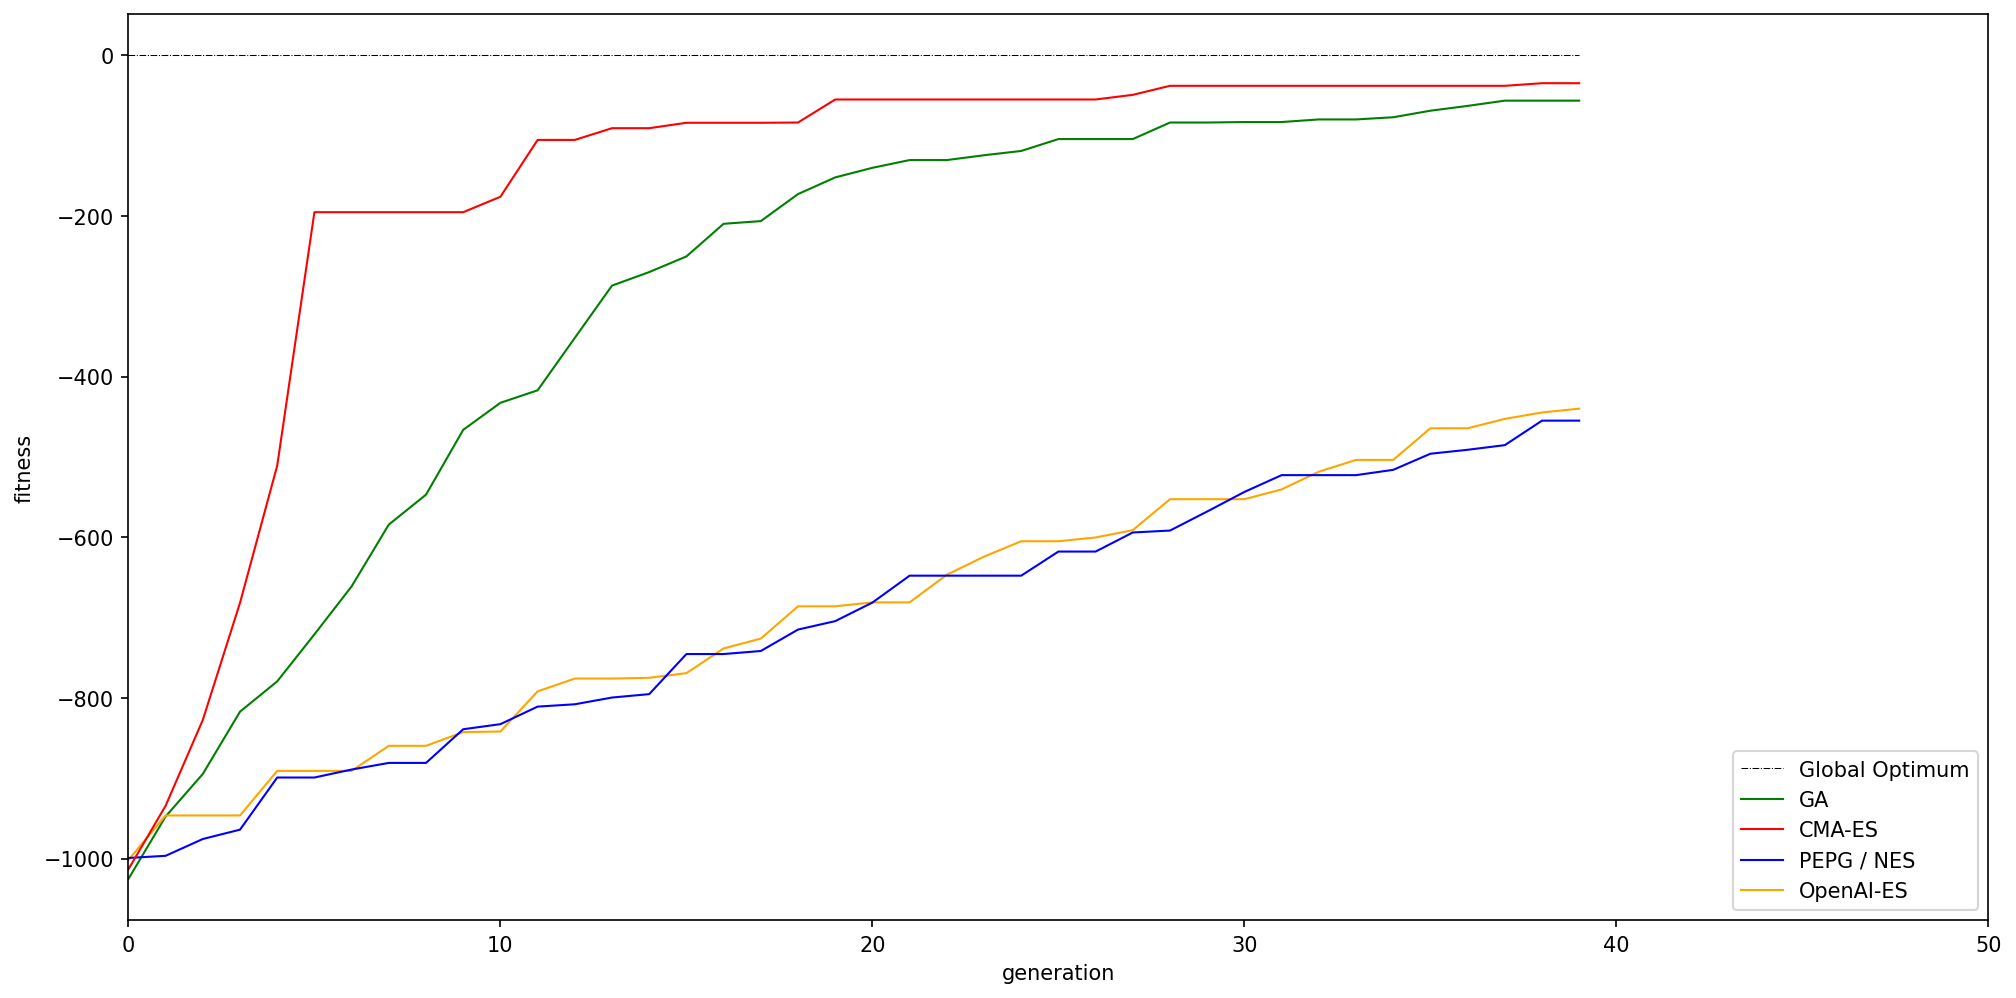

In [24]:
# Create a new figure of size 8x6 points, using 100 dots per inch
best_history = [0] * MAX_ITERATION
plt.figure(figsize=(16,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=0.5, linestyle="-.", label='Global Optimum')
ga_line, = plt.plot(ga_history, color="green", linewidth=1.0, linestyle="-", label='GA')
oes_line, = plt.plot(oes_history, color="orange", linewidth=1.0, linestyle="-", label='OpenAI-ES')
pepg_line, = plt.plot(pepg_history, color="blue", linewidth=1.0, linestyle="-", label='PEPG / NES')
cma_line, = plt.plot(cma_history, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')

plt.legend(handles=[optimum_line, ga_line, cma_line, pepg_line, oes_line], loc=4)

# Set x limits
# plt.xlim(0,2500)
plt.xlim(0, 50)

plt.xlabel('generation')
plt.ylabel('fitness')

# plt.savefig("./rastrigin_10d.svg")

plt.show()

In [26]:
len(cma_history)

40